In [1]:
library(car)
library(leaps)
library(knitr)
library(kableExtra)
library(tidyverse)

Loading required package: carData



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::group_rows() masks kableExtra::group_rows()
✖ dplyr::lag()        masks stats::lag()
✖ dplyr::recode()     masks car::recode()
✖ purrr::some()       masks car::some()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [55]:
ames_housing = read.table("https://raw.githubusercontent.com/AllenCheng5186/STAT306-G14-Group-Project/refs/heads/main/data/ames-housing.csv", sep = ",", header=T)

ames_housing$SalePrice = ames_housing$SalePrice / 1000


In [179]:
# house = ames_housing[, c("SalePrice", "Overall.Qual", "Gr.Liv.Area",
#                          "Garage.Area", "Year.Built", "Lot.Area",
#                          "Bedroom.AbvGr", "Kitchen.AbvGr", "Lot.Shape",
#                          "Total.Bsmt.SF", "X1st.Flr.SF", "X2nd.Flr.SF",
#                          "Neighborhood", "TotRms.AbvGrd", "Street", "Alley",
#                          "Utilities", "Foundation", "Heating", "Central.Air")]
# house = ames_housing[, c("SalePrice", "MS.Zoning", "Lot.Area", "Lot.Shape",
#                          "Land.Contour", "Utilities", "Overall.Qual",
#                          "Overall.Cond", "Year.Built", "Foundation",
#                          "Heating", "Central.Air", "Gr.Liv.Area",
#                          "Bedroom.AbvGr", "Kitchen.AbvGr", "TotRms.AbvGrd",
#                          "Garage.Type", "Garage.Area", "Pool.Area", "Fence",
#                          "Yr.Sold")]

house = ames_housing[, c("SalePrice", "Overall.Qual", "Gr.Liv.Area",
                         "Garage.Area", "Year.Built", "Lot.Area",
                         "Bedroom.AbvGr", "Kitchen.AbvGr", "Lot.Shape",
                         "Utilities", "Yr.Sold", "Central.Air",
                         "Electrical", "TotRms.AbvGrd")]

house[is.na(house)] <- 0
house[sapply(house, is.character)] = lapply(house[sapply(house, is.character)], as.factor)
house$Overall.Qual <- as.factor(house$Overall.Qual)

head(house)


,SalePrice,Overall.Qual,Gr.Liv.Area,Garage.Area,Year.Built,Lot.Area,Bedroom.AbvGr,Kitchen.AbvGr,Lot.Shape,Utilities,Yr.Sold,Central.Air,Electrical,TotRms.AbvGrd
,<dbl>,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<int>
1,215.0,6,1656,528,1960,31770,3,1,IR1,AllPub,2010,Y,SBrkr,7
2,105.0,5,896,730,1961,11622,2,1,Reg,AllPub,2010,Y,SBrkr,5
3,172.0,6,1329,312,1958,14267,3,1,IR1,AllPub,2010,Y,SBrkr,6
4,244.0,7,2110,522,1968,11160,3,1,Reg,AllPub,2010,Y,SBrkr,8
5,189.9,5,1629,482,1997,13830,3,1,IR1,AllPub,2010,Y,SBrkr,6
6,195.5,6,1604,470,1998,9978,3,1,IR1,AllPub,2010,Y,SBrkr,7


In [180]:
full_linear_reg = lm(SalePrice~., data = house)
summary(full_linear_reg)


Call:
lm(formula = SalePrice ~ ., data = house)

Residuals:
    Min      1Q  Median      3Q     Max 
-484.33  -15.29   -0.43   13.24  222.51 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -2.910e+02  9.330e+02  -0.312 0.755105    
Overall.Qual2    2.574e+01  1.895e+01   1.358 0.174439    
Overall.Qual3    3.500e+01  1.737e+01   2.015 0.043998 *  
Overall.Qual4    4.291e+01  1.677e+01   2.558 0.010578 *  
Overall.Qual5    5.684e+01  1.671e+01   3.401 0.000680 ***
Overall.Qual6    6.329e+01  1.674e+01   3.781 0.000159 ***
Overall.Qual7    7.984e+01  1.680e+01   4.753 2.11e-06 ***
Overall.Qual8    1.223e+02  1.690e+01   7.238 5.81e-13 ***
Overall.Qual9    1.975e+02  1.718e+01  11.493  < 2e-16 ***
Overall.Qual10   2.300e+02  1.807e+01  12.730  < 2e-16 ***
Gr.Liv.Area      5.840e-02  2.509e-03  23.275  < 2e-16 ***
Garage.Area      3.537e-02  3.784e-03   9.347  < 2e-16 ***
Year.Built       4.291e-01  2.863e-02  14.990  < 2e-16 ***
Lot.Area        

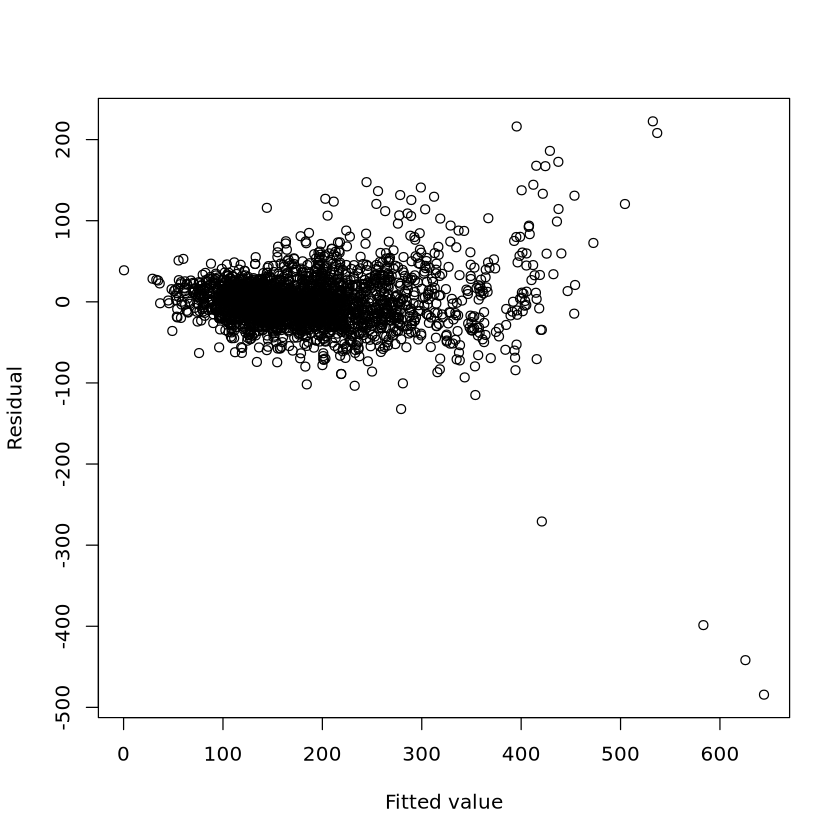

In [181]:
plot(x = full_linear_reg$fitted.values, y = full_linear_reg$residuals,
    #  xlim = c(1.9, 3.8), ylim =c(-1.0, 0.8),  #TODO outlier in residual plot
     xlab="Fitted value", ylab="Residual")

In [182]:
full_model <- lm(SalePrice ~ ., data = house)

# Forward selection based on R²
forward <- ols_step_forward_r2(full_model)

forward$metrics

step,variable,r2,adj_r2,aic,sbc,sbic
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Overall.Qual,0.7022529,0.7013352,30456.62,30522.43,22123.55
2,Gr.Liv.Area,0.7810357,0.7802856,29558.13,29629.92,21225.69
3,Year.Built,0.8074460,0.8067201,29183.53,29261.31,20851.56
4,Lot.Area,0.8171124,0.8163600,29034.62,29118.38,20702.89
5,Garage.Area,0.8234990,0.8227121,28932.47,29022.22,20601.00
6,Kitchen.AbvGr,0.8280960,0.8272704,28857.15,28952.87,20525.96
7,Lot.Shape,0.8299461,0.8289533,28831.45,28945.12,20496.40
8,Bedroom.AbvGr,0.8314651,0.8304230,28807.16,28926.81,20472.26
9,Central.Air,0.8319760,0.8308789,28800.26,28925.90,20465.43


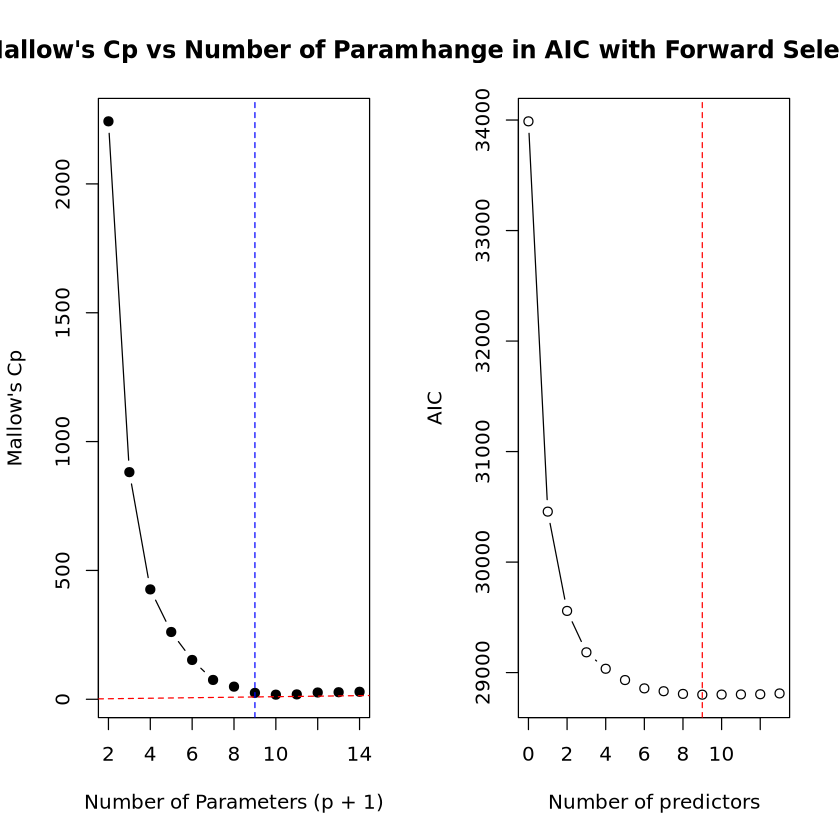

In [187]:
cp_scores <- numeric(length = length(forward$metrics$variable))
num_params <- numeric(length = length(forward$metrics$variable))
cp_distance <- numeric(length = length(forward$metrics$variable))

# Mallow's Cp
for (i in seq_along(forward$metrics$variable)) {
  predictors <- forward$metrics$variable[1:i]
  formula_str <- paste("SalePrice ~", paste(predictors, collapse = " + "))
  model_i <- lm(as.formula(formula_str), data = house)
  cp_val <- ols_mallows_cp(model_i, full_model)
  cp_scores[i] <- cp_val
  num_params[i] <- length(predictors) + 1
  cp_distance[i] = abs(cp_val - (length(predictors) + 1))
}

# AIC
predictors <- setdiff(names(house), "SalePrice")

current_formula <- as.formula("SalePrice ~ 1")
current_model <- lm(current_formula, data = house)
aic_values <- c(AIC(current_model))
num_predictors <- 0
selected <- c()

for(i in 1:length(predictors)) {
  remaining <- setdiff(predictors, selected)
  aic_candidates <- sapply(remaining, function(var) {
    new_formula <- as.formula(paste("SalePrice ~", paste(c(selected, var), collapse = " + ")))
    AIC(lm(new_formula, data = house))
  })
  best_var <- names(which.min(aic_candidates))
  selected <- c(selected, best_var)
  current_formula <- as.formula(paste("SalePrice ~", paste(selected, collapse = " + ")))
  current_model <- lm(current_formula, data = house)
  aic_values <- c(aic_values, AIC(current_model))
  num_predictors <- c(num_predictors, length(selected))
}

par(mfrow = c(1, 2))
# Plot Cp vs p+1
plot(num_params, cp_scores, type = "b", pch = 19,
     xlab = "Number of Parameters (p + 1)",
     ylab = "Mallow's Cp",
     main = "Mallow's Cp vs Number of Parameters")
abline(0, 1, col = "red", lty = 2)
abline(v = which.min(cp_distance), col = "blue", lty = 2)
# Plot AIC vs. number of predictors
plot(0:length(predictors), aic_values, type = "b",
     xlab = "Number of predictors", ylab = "AIC",
     main = "Change in AIC with Forward Selection")

min_index <- which.min(aic_values)
min_num_pred <- num_predictors[min_index]
abline(v = min_num_pred, col = "red", lty = 2)

In [183]:
predictors <- setdiff(names(house), "SalePrice")

# Initialize with the null model (intercept only)
current_formula <- as.formula("SalePrice ~ 1")
current_model <- lm(current_formula, data = house)
aic_values <- c(AIC(current_model))
num_predictors <- 0
selected <- c()

# Forward selection: iteratively add one predictor that gives the lowest AIC.
for(i in 1:length(predictors)) {
  remaining <- setdiff(predictors, selected)
  
  aic_candidates <- sapply(remaining, function(var) {
    new_formula <- as.formula(paste("SalePrice ~", paste(c(selected, var), collapse = " + ")))
    AIC(lm(new_formula, data = house))
  })
  
  best_var <- names(which.min(aic_candidates))
  selected <- c(selected, best_var)
  
  current_formula <- as.formula(paste("SalePrice ~", paste(selected, collapse = " + ")))
  current_model <- lm(current_formula, data = house)
  
  aic_values <- c(aic_values, AIC(current_model))
  num_predictors <- c(num_predictors, length(selected))
}

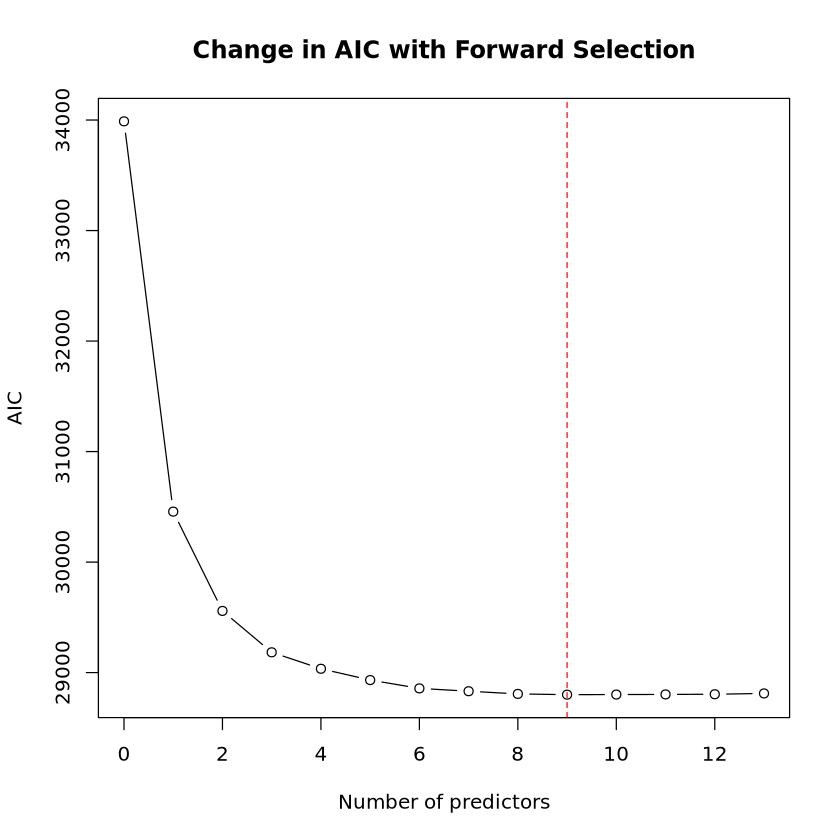

In [184]:
# Plot AIC vs. number of predictors
plot(0:length(predictors), aic_values, type = "b",
     xlab = "Number of predictors", ylab = "AIC",
     main = "Change in AIC with Forward Selection")

min_index <- which.min(aic_values)
min_num_pred <- num_predictors[min_index]
abline(v = min_num_pred, col = "red", lty = 2)

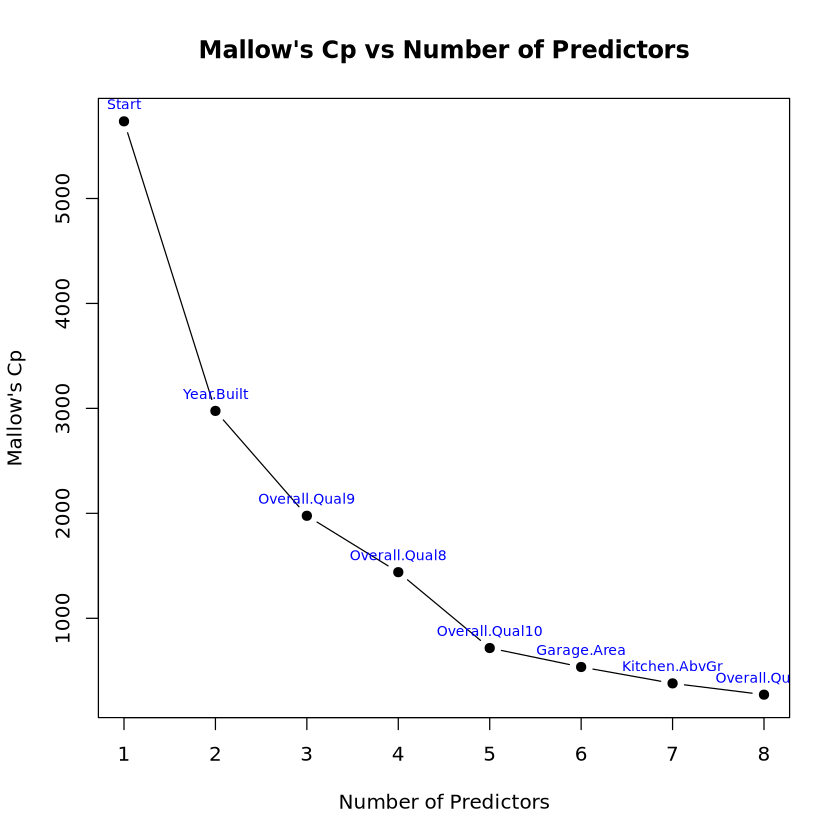

In [185]:
# {r fig.height=5,fig.width=5}
s <- regsubsets(house$SalePrice~., data=house, method = "forward") 

ss <- summary(s)

# s_summary <- as.data.frame(summary(s)$outmat)
# kable(s_summary, format = "latex", booktabs = TRUE) %>%
#   kable_styling(latex_options = c("scale_down", "hold_position"))

cps <- ss$cp
num_predictors <- apply(ss$which, 1, function(x) sum(x) - 1) 

model_matrix <- ss$which[, -1, drop = FALSE]  
model_names <- colnames(model_matrix)

added_vars <- character(nrow(model_matrix))
for (i in 2:nrow(model_matrix)) {
  prev <- model_matrix[i - 1, ]
  curr <- model_matrix[i, ]
  new_var <- setdiff(model_names[curr & !prev], model_names[prev])
  added_vars[i] <- ifelse(length(new_var) > 0, new_var, "")
}
added_vars[1] <- "Start"  

plot(num_predictors, cps, type = "b", pch = 19,
     xlab = "Number of Predictors", ylab = "Mallow's Cp",
     main = "Mallow's Cp vs Number of Predictors")
text(num_predictors, cps, labels = added_vars, pos = 3, cex = 0.7, col = "blue")
# abline(0, 1, col = "red", lty = 2)
abline(a = 1, b = 1, col = "red", lty = 2)

In [16]:
cps

[1] 7162.7685 3948.6221 2784.2350 2062.5839 1624.9712 1033.6878  841.3315
[8]  705.0914

In [17]:
View(ss$which)

,(Intercept),Overall.Qual2,Overall.Qual3,Overall.Qual4,Overall.Qual5,Overall.Qual6,Overall.Qual7,Overall.Qual8,Overall.Qual9,Overall.Qual10,⋯,NeighborhoodNWAmes,NeighborhoodOldTown,NeighborhoodSawyer,NeighborhoodSawyerW,NeighborhoodSomerst,NeighborhoodStoneBr,NeighborhoodSWISU,NeighborhoodTimber,NeighborhoodVeenker,TotRms.AbvGrd
1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
4,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
5,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
6,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
7,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
8,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


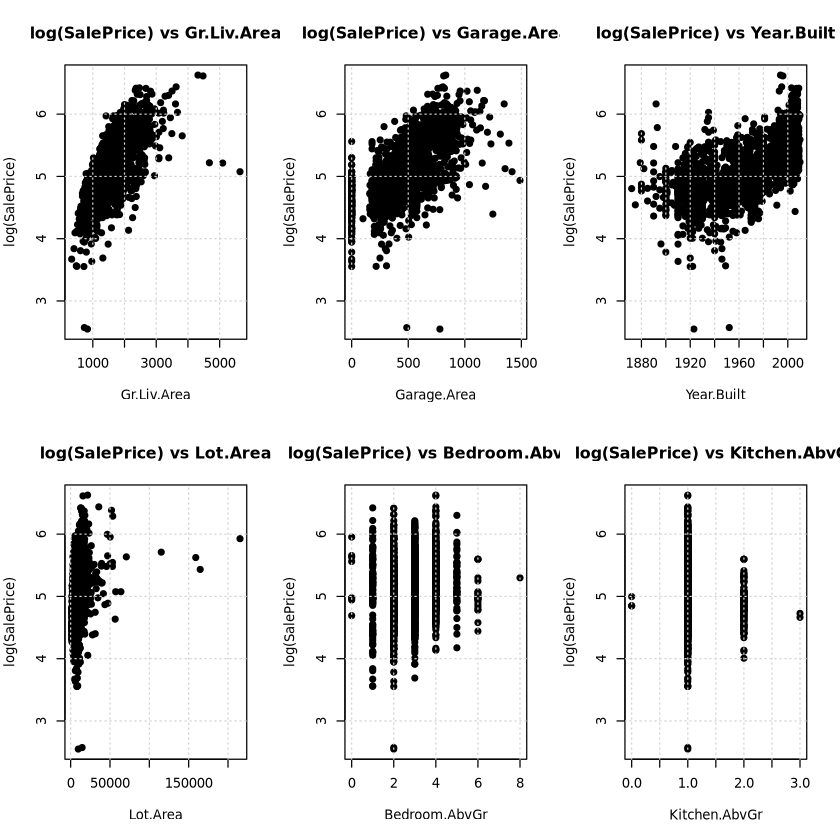

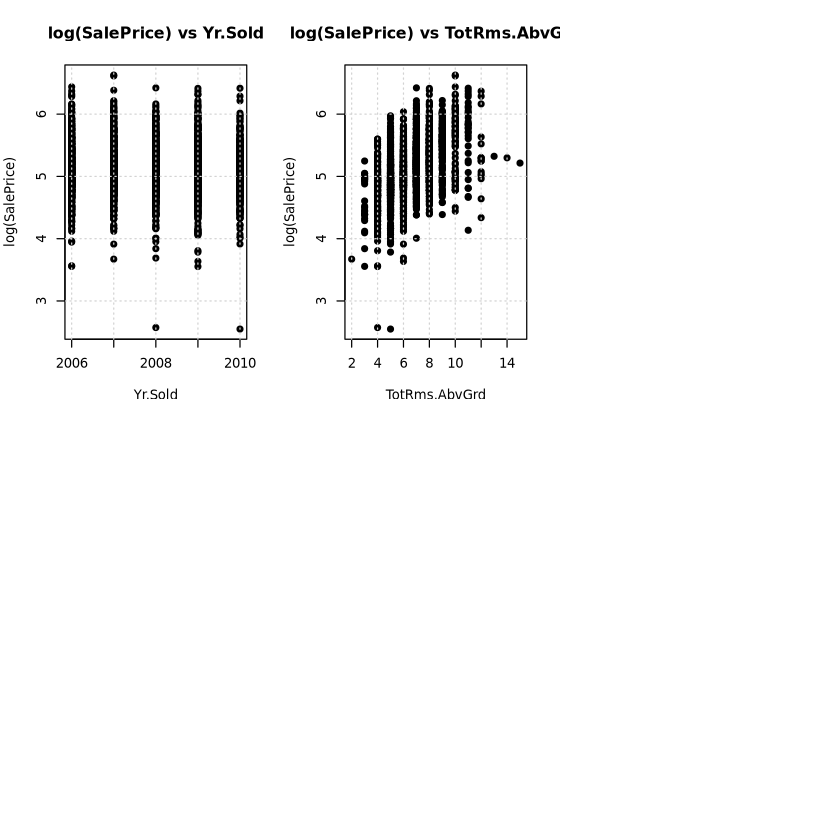

In [188]:
num_vars <- names(house)[sapply(house, is.numeric)]
predictors <- setdiff(num_vars, c("SalePrice", "log_SalePrice"))

# options(repr.plot.width = 15, repr.plot.height = 10)
par(mfrow = c(2, 3))

for (var in predictors) {
  plot(house[[var]], log(house$SalePrice), pch=19,
       xlab = var, ylab = "log(SalePrice)",
       main = paste("log(SalePrice) vs", var))
  grid()
}